In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
datasets = [
    ("OHE_MinMax", "AgriYield_OHE_MinMax.csv"),
    ("OHE_Standard", "AgriYield_OHE_Standard.csv"),
    ("LOO_MinMax", "AgriYield_LOO_MinMax.csv"),
    ("LOO_Standard", "AgriYield_LOO_Standard.csv")
]

In [3]:
def evaluate_models(dataset_name, file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Crop_Yield'])
    y = df['Crop_Yield']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
        "XGBoost": xgb.XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1,
            objective='reg:squarederror')
    }

    # Evaluate models
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results.append([dataset_name, name, mae, mse, rmse, r2])

    return pd.DataFrame(results, columns=["Dataset", "Model", "MAE", "MSE", "RMSE", "R²"])


In [4]:
all_results = pd.DataFrame()

for name, file in datasets:
    results = evaluate_models(name, file)
    all_results = pd.concat([all_results, results], ignore_index=True)

print("Model evaluation completed for all datasets and models!")

Model evaluation completed for all datasets and models!


| Metric   | What It Measures           | Lower/Better | Intuition                                      |
| -------- | -------------------------- | ------------ | ---------------------------------------------- |
| **MAE**  | Average absolute deviation | ✅ Lower      | Mean “distance” from truth (easy to interpret) |
| **MSE**  | Average squared deviation  | ✅ Lower      | Penalizes large errors more                    |
| **RMSE** | Square root of MSE         | ✅ Lower      | Interpretable in same units as target (t/ha)   |
| **R²**   | Variance explained         | ✅ Higher     | Closer to 1 → better model fit                 |


In [5]:
pd.set_option('display.max_rows', None)
print(all_results.sort_values(by=["Dataset", "R²"], ascending=[True, False]))

         Dataset              Model       MAE       MSE      RMSE        R²
9     LOO_MinMax      Random Forest  0.001154  0.000007  0.002690  0.999733
11    LOO_MinMax            XGBoost  0.006317  0.000082  0.009069  0.996968
10    LOO_MinMax  Gradient Boosting  0.014585  0.000395  0.019886  0.985423
8     LOO_MinMax  Linear Regression  0.083325  0.011717  0.108247  0.568052
13  LOO_Standard      Random Forest  0.007057  0.000274  0.016548  0.999729
15  LOO_Standard            XGBoost  0.038638  0.003078  0.055476  0.996959
14  LOO_Standard  Gradient Boosting  0.089356  0.014813  0.121708  0.985363
12  LOO_Standard  Linear Regression  0.508940  0.437137  0.661163  0.568052
3     OHE_MinMax            XGBoost  0.023798  0.001128  0.033591  0.958404
1     OHE_MinMax      Random Forest  0.024641  0.001222  0.034961  0.954943
2     OHE_MinMax  Gradient Boosting  0.031433  0.001956  0.044230  0.927883
0     OHE_MinMax  Linear Regression  0.083321  0.011713  0.108227  0.568209
7   OHE_Stan

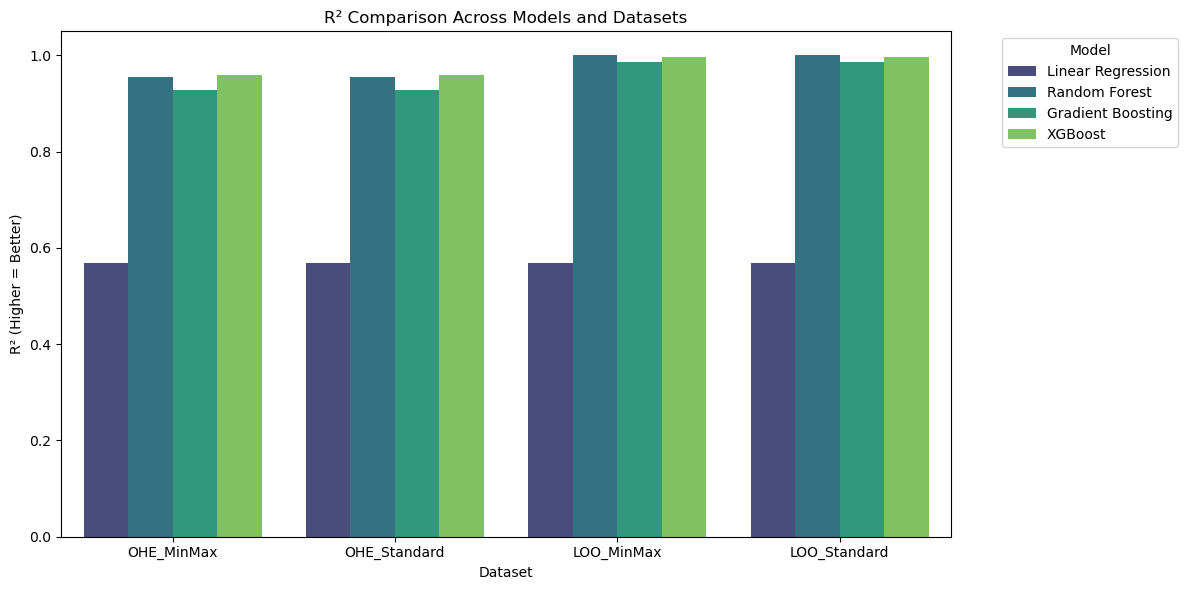

In [6]:
# R2 Comparision
plt.figure(figsize=(12,6))
sns.barplot(x="Dataset", y="R²", hue="Model", data=all_results, palette="viridis")
plt.title("R² Comparison Across Models and Datasets")
plt.ylabel("R² (Higher = Better)")
plt.xlabel("Dataset")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

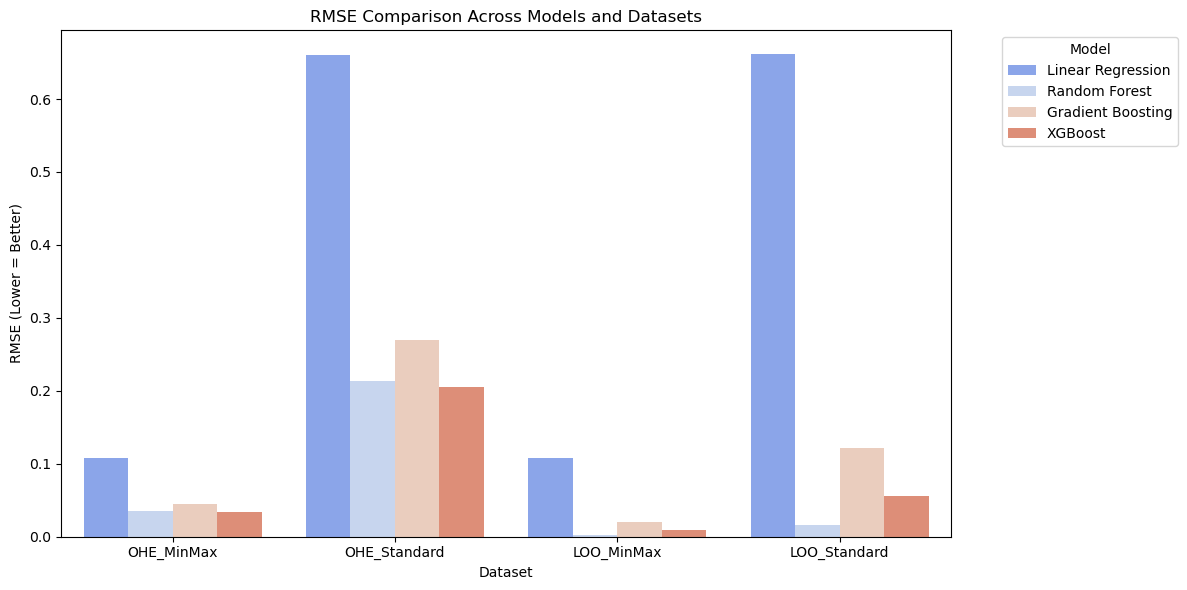

In [7]:
#rmse comparision
plt.figure(figsize=(12,6))
sns.barplot(x="Dataset", y="RMSE", hue="Model", data=all_results, palette="coolwarm")
plt.title("RMSE Comparison Across Models and Datasets")
plt.ylabel("RMSE (Lower = Better)")
plt.xlabel("Dataset")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


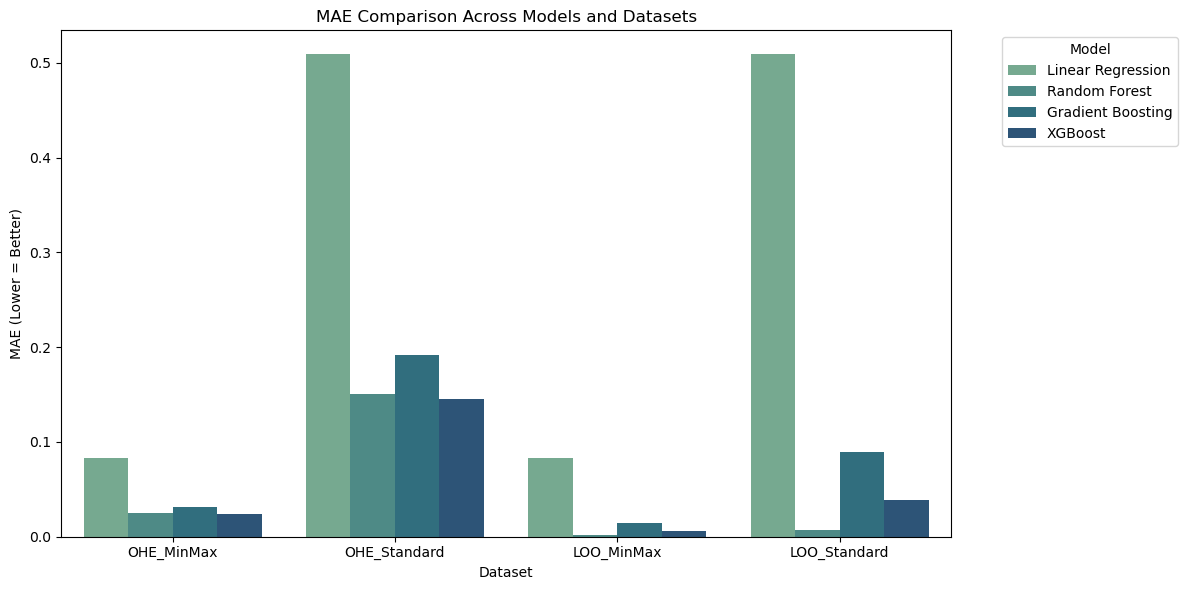

In [8]:
# mae comparision 
plt.figure(figsize=(12,6))
sns.barplot(x="Dataset", y="MAE", hue="Model", data=all_results, palette="crest")
plt.title("MAE Comparison Across Models and Datasets")
plt.ylabel("MAE (Lower = Better)")
plt.xlabel("Dataset")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
all_results.to_csv("AgriYield_Model_Comparison_FullMetrics.csv", index=False)
print("Saved detailed results with MAE, MSE, RMSE, R² to 'AgriYield_Model_Comparison_FullMetrics.csv'")

Saved detailed results with MAE, MSE, RMSE, R² to 'AgriYield_Model_Comparison_FullMetrics.csv'


In [10]:
df = pd.read_csv("AgriYield_LOO_MinMax.csv")

# Split features and target
X = df.drop(columns=['Crop_Yield'])
y = df['Crop_Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:
# Define model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid Search CV (5-fold)
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

print("🚀 Tuning Random Forest hyperparameters...")
grid_rf.fit(X_train, y_train)
print("\n✅ Best Random Forest Parameters:")
print(grid_rf.best_params_)
print("Best Cross-Validation R²:", grid_rf.best_score_)


🚀 Tuning Random Forest hyperparameters...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best Random Forest Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation R²: 0.9979889023210193



📈 Tuned Random Forest Results:
MAE  : 0.004131
RMSE : 0.006759
R²   : 0.998316


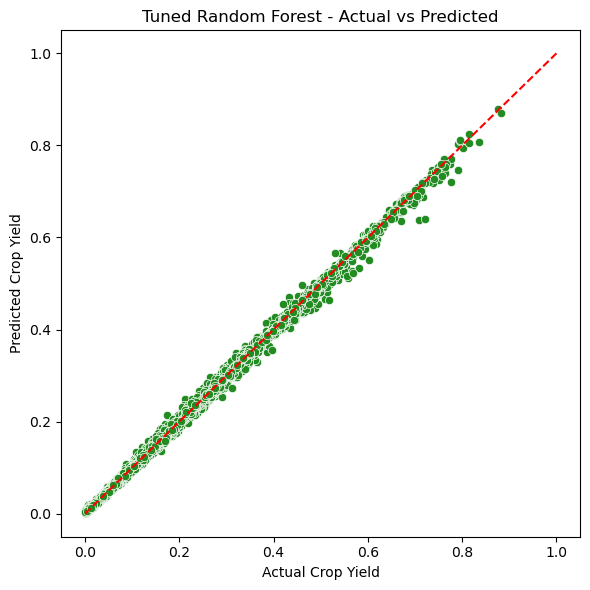

In [12]:
# Predict using the best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n📈 Tuned Random Forest Results:")
print(f"MAE  : {mae_rf:.6f}")
print(f"RMSE : {rmse_rf:.6f}")
print(f"R²   : {r2_rf:.6f}")

# Visualize
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='forestgreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Tuned Random Forest - Actual vs Predicted")
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.tight_layout()
plt.show()


In [13]:
# Use your tuned model (from GridSearchCV)
best_model = grid_rf.best_estimator_  # or grid_xgb.best_estimator_

# Evaluate on training data
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Evaluate on testing data
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("📊 Model Performance Summary")
print(f"Training R²  : {train_r2:.4f}")
print(f"Testing R²   : {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE : {test_rmse:.4f}")


📊 Model Performance Summary
Training R²  : 0.9998
Testing R²   : 0.9983
Training RMSE: 0.0025
Testing RMSE : 0.0068


In [14]:
# Define model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search CV
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

print("🚀 Tuning XGBoost hyperparameters...")
grid_xgb.fit(X_train, y_train)
print("\n✅ Best XGBoost Parameters:")
print(grid_xgb.best_params_)
print("Best Cross-Validation R²:", grid_xgb.best_score_)


🚀 Tuning XGBoost hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best XGBoost Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.8}
Best Cross-Validation R²: 0.9980347845922133



📈 Tuned XGBoost Results:
MAE  : 0.004227
RMSE : 0.006432
R²   : 0.998475


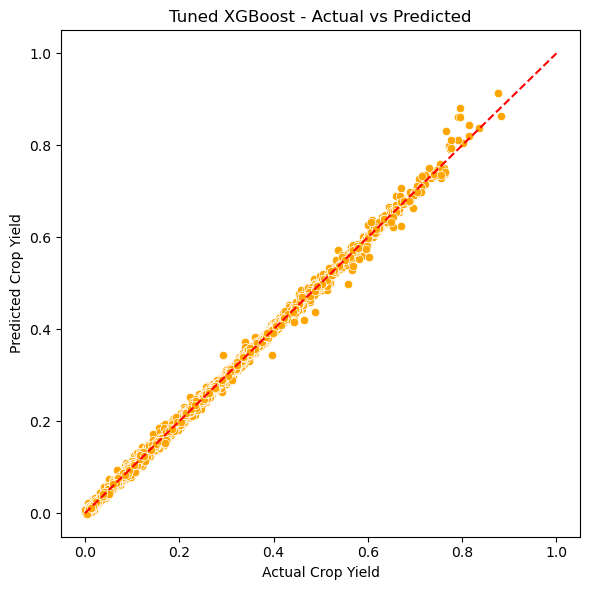

In [15]:
# Predict using the best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📈 Tuned XGBoost Results:")
print(f"MAE  : {mae_xgb:.6f}")
print(f"RMSE : {rmse_xgb:.6f}")
print(f"R²   : {r2_xgb:.6f}")

# Visualize
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Tuned XGBoost - Actual vs Predicted")
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.tight_layout()
plt.show()


In [16]:
# Use your tuned model (from GridSearchCV)
best_model = grid_xgb.best_estimator_

# Evaluate on training data
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Evaluate on testing data
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("📊 Model Performance Summary")
print(f"Training R²  : {train_r2:.4f}")
print(f"Testing R²   : {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE : {test_rmse:.4f}")


📊 Model Performance Summary
Training R²  : 0.9995
Testing R²   : 0.9985
Training RMSE: 0.0037
Testing RMSE : 0.0064



📊 Tuned Model Performance Comparison:


,Model,MAE,RMSE,R²
0,Random Forest (Tuned),0.004131,0.006759,0.998316
1,XGBoost (Tuned),0.004227,0.006432,0.998475


C:\Users\abida\AppData\Local\Temp\ipykernel_14928\3650228217.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_tuned, palette='viridis')


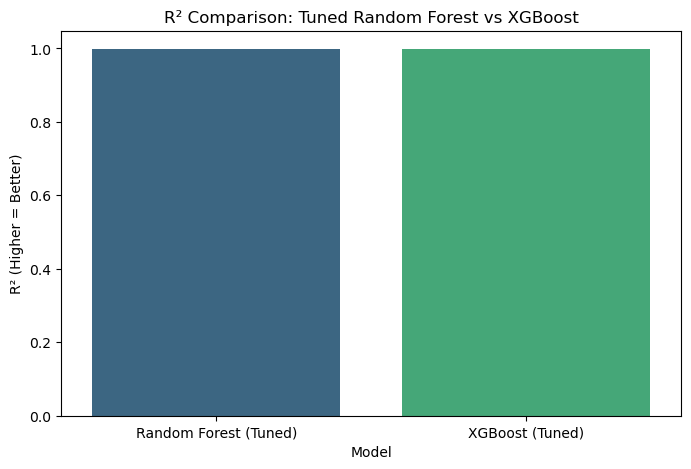

In [17]:
results_tuned = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'MAE': [mae_rf, mae_xgb],
    'RMSE': [rmse_rf, rmse_xgb],
    'R²': [r2_rf, r2_xgb]
})

print("\n📊 Tuned Model Performance Comparison:")
display(results_tuned)

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R²', data=results_tuned, palette='viridis')
plt.title("R² Comparison: Tuned Random Forest vs XGBoost")
plt.ylabel("R² (Higher = Better)")
plt.show()


In [18]:
# Load dataset (example: OHE_MinMax)
df = pd.read_csv("AgriYield_LOO_Standard.csv")

# Split features and target
X = df.drop(columns=['Crop_Yield'])
y = df['Crop_Yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [19]:
# Define model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid Search CV (5-fold)
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

print("🚀 Tuning Random Forest hyperparameters...")
grid_rf.fit(X_train, y_train)
print("\n✅ Best Random Forest Parameters:")
print(grid_rf.best_params_)
print("Best Cross-Validation R²:", grid_rf.best_score_)


🚀 Tuning Random Forest hyperparameters...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best Random Forest Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation R²: 0.9979850548119981



📈 Tuned Random Forest Results:
MAE  : 0.025101
RMSE : 0.041018
R²   : 0.998337


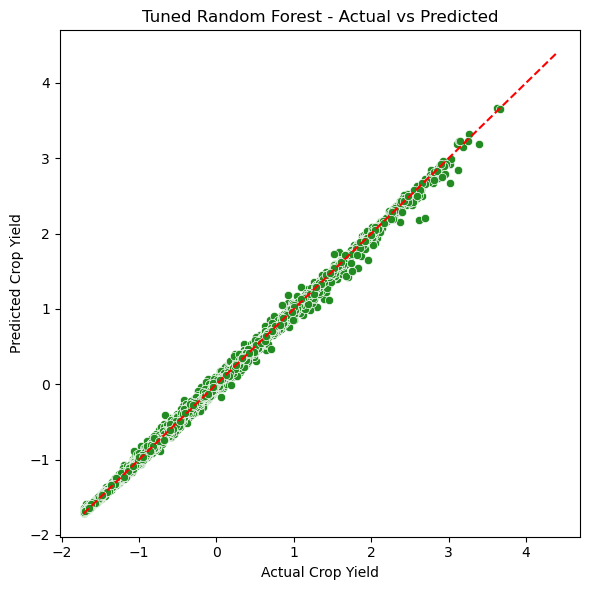

In [20]:
# Predict using the best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n📈 Tuned Random Forest Results:")
print(f"MAE  : {mae_rf:.6f}")
print(f"RMSE : {rmse_rf:.6f}")
print(f"R²   : {r2_rf:.6f}")

# Visualize
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='forestgreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Tuned Random Forest - Actual vs Predicted")
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.tight_layout()
plt.show()


In [21]:
# Use your tuned model (from GridSearchCV)
best_model = grid_rf.best_estimator_  # or grid_xgb.best_estimator_

# Evaluate on training data
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Evaluate on testing data
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("📊 Model Performance Summary")
print(f"Training R²  : {train_r2:.4f}")
print(f"Testing R²   : {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE : {test_rmse:.4f}")


📊 Model Performance Summary
Training R²  : 0.9998
Testing R²   : 0.9983
Training RMSE: 0.0151
Testing RMSE : 0.0410


In [22]:
# Define model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search CV
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

print("🚀 Tuning XGBoost hyperparameters...")
grid_xgb.fit(X_train, y_train)
print("\n✅ Best XGBoost Parameters:")
print(grid_xgb.best_params_)
print("Best Cross-Validation R²:", grid_xgb.best_score_)


🚀 Tuning XGBoost hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best XGBoost Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.8}
Best Cross-Validation R²: 0.9980821872870124



📈 Tuned XGBoost Results:
MAE  : 0.025096
RMSE : 0.038723
R²   : 0.998518


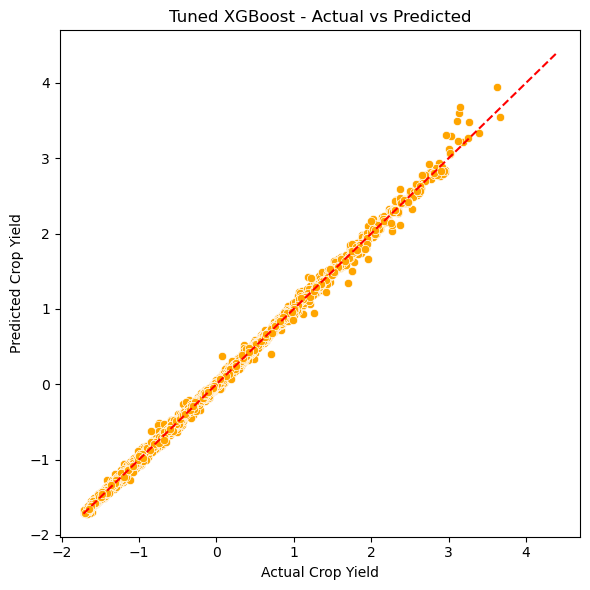

In [23]:
# Predict using the best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📈 Tuned XGBoost Results:")
print(f"MAE  : {mae_xgb:.6f}")
print(f"RMSE : {rmse_xgb:.6f}")
print(f"R²   : {r2_xgb:.6f}")

# Visualize
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Tuned XGBoost - Actual vs Predicted")
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.tight_layout()
plt.show()


In [24]:
# Use your tuned model (from GridSearchCV)
best_model = grid_xgb.best_estimator_

# Evaluate on training data
y_train_pred = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Evaluate on testing data
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("📊 Model Performance Summary")
print(f"Training R²  : {train_r2:.4f}")
print(f"Testing R²   : {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE : {test_rmse:.4f}")


📊 Model Performance Summary
Training R²  : 0.9998
Testing R²   : 0.9985
Training RMSE: 0.0151
Testing RMSE : 0.0387



📊 Tuned Model Performance Comparison:


,Model,MAE,RMSE,R²
0,Random Forest (Tuned),0.025101,0.041018,0.998337
1,XGBoost (Tuned),0.025096,0.038723,0.998518


C:\Users\abida\AppData\Local\Temp\ipykernel_14928\3650228217.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_tuned, palette='viridis')


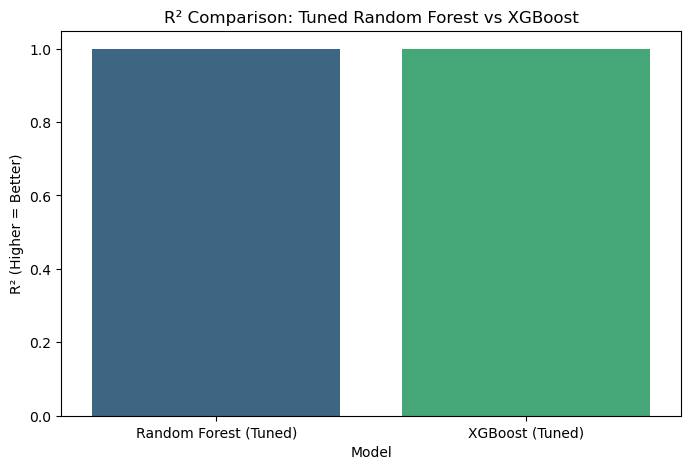

In [25]:
results_tuned = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'MAE': [mae_rf, mae_xgb],
    'RMSE': [rmse_rf, rmse_xgb],
    'R²': [r2_rf, r2_xgb]
})

print("\n📊 Tuned Model Performance Comparison:")
display(results_tuned)

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R²', data=results_tuned, palette='viridis')
plt.title("R² Comparison: Tuned Random Forest vs XGBoost")
plt.ylabel("R² (Higher = Better)")
plt.show()


### 